# Tabular example

In [90]:
from fastai import *          # Quick accesss to most common functionality
from fastai.tabular import *  # Quick accesss to tabular functionality     # Access to example data provided with fastai

Tabular data should be in a Pandas `DataFrame`.

In [91]:
path = Path('~/.fastai/data/googleplaystore')
df = pd.read_csv(path/'googleplaystore.csv')

In [92]:
df = df.replace('price', value='/\D/')
median_rating = df['rating'].median()
df['rating'].fillna(median_rating, inplace=True)
df['rating'] = df['rating'].astype(float)

In [93]:
dep_var = 'rating'
cat_names = ['app', 'installs', 'category', 'type', 'content-rating', 'genres', 'last-updated', 'current-ver', 'android-ver']
cont_names = ['reviews']
procs = [FillMissing, Categorify, Normalize]

In [94]:
test = TabularList.from_df(df.iloc[:-2000].copy(), path=path, cat_names=cat_names, cont_names=cont_names)

In [95]:
valid_idx = range(len(df)-10000, len(df))

In [96]:
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(valid_idx)
                           .label_from_df(cols=dep_var, label_cls=FloatList)
                           .add_test(test, label=0)
                           .databunch())

In [97]:
data.show_batch(rows=20)

app,installs,category,type,content-rating,genres,last-updated,current-ver,android-ver,reviews,target
"Chispa, the Dating App for Latino, Latina Singles","100,000+",DATING,Free,Mature 17+,Dating,"July 25, 2018",1.6.1,4.4 and up,-0.1562,4.199999809265137
Random Video Chat,"1,000+",DATING,Free,Mature 17+,Dating,"July 15, 2018",4.20,4.0.3 and up,-0.1571,4.300000190734863
"U Launcher Lite – FREE Live Cool Themes, Hide Apps","5,000,000+",ART_AND_DESIGN,Free,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,-0.1383,4.699999809265137
FarmersOnly Dating,"100,000+",DATING,Free,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up,-0.1569,3.0
Discover Color,"100,000+",BEAUTY,Free,Everyone,Beauty,"May 24, 2018",1.1,4.0.3 and up,-0.1570,4.0
Socratic - Math Answers & Homework Help,"1,000,000+",EDUCATION,Free,Everyone,Education,"June 7, 2018",1.8.1,4.1 and up,-0.1490,4.599999904632568
"Hide App, Private Dating, Safe Chat - PrivacyHider","1,000,000+",DATING,Free,Everyone,Dating,"May 21, 2018",2.9.6,4.0 and up,-0.1495,4.400000095367432
Google Duo - High Quality Video Calls,"500,000,000+",COMMUNICATION,Free,Everyone,Communication,"July 31, 2018",37.1.206017801.DR37_RC14,4.4 and up,0.2908,4.599999904632568
Pink Silver Bow Keyboard Theme,"100,000+",ART_AND_DESIGN,Free,Everyone,Art & Design,"July 12, 2018",6.7.12.2018,4.0.3 and up,-0.1569,4.199999809265137
Sudy – Meet Elite & Rich Single,"500,000+",DATING,Free,Mature 17+,Dating,"June 25, 2018",4.1.2,4.0.3 and up,-0.1534,4.099999904632568


In [104]:
learn = get_tabular_learner(data, layers=[50, 50], metrics=exp_rmspe)

In [106]:
learn.fit_one_cycle(8)

Total time: 00:06
epoch  train_loss  valid_loss  exp_rmspe
1      2.239814    2.011120    0.776614   (00:00)
2      1.697729    0.684317    0.790997   (00:00)
3      1.090048    0.298678    1.068014   (00:00)
4      0.728600    0.321389    1.210407   (00:00)
5      0.512963    0.269400    1.181308   (00:00)
6      0.378703    0.295304    1.210219   (00:00)
7      0.283824    0.301803    1.171761   (00:00)
8      0.214776    0.289820    1.159468   (00:00)



In [20]:
# learn.save('first-try')

In [19]:
learn.load('first-try')

FileNotFoundError: [Errno 2] No such file or directory: '~/.fastai/data/googleplaystore/models/first-try.pth'

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


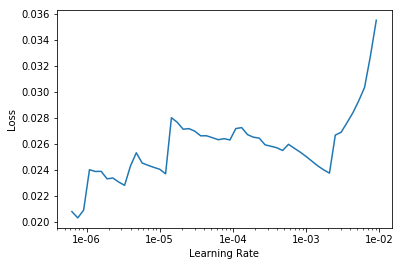

In [21]:
learn.lr_find()
learn.recorder.plot()

In [165]:
learn.fit_one_cycle(5, 9e-03)

Total time: 00:04
epoch  train_loss  valid_loss  exp_rmspe
1      0.079574    0.300090    1.060873   (00:00)
2      0.085294    0.276419    1.383088   (00:00)
3      0.090225    0.286111    1.471845   (00:00)
4      0.078222    0.246352    1.145986   (00:00)
5      0.064022    0.253517    1.159736   (00:00)



## Inference

In [109]:
row = df.iloc[-1]
print(row)

app               iHoroscope - 2018 Daily Horoscope & Astrology
category                                              LIFESTYLE
rating                                                      4.5
reviews                                                  398307
size                                                        19M
installs                                            10,000,000+
type                                                       Free
price                                                         0
content-rating                                         Everyone
genres                                                Lifestyle
last-updated                                      July 25, 2018
current-ver                                  Varies with device
android-ver                                  Varies with device
Name: 10840, dtype: object


In [110]:
learn.predict(row)

tensor([[4.1664]])